In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('train_num.csv')
test_df=pd.read_csv('train_num.csv', header=0)

In [3]:
print(df)

       Unnamed: 0  sex  smoke_status  drinking_status      bmi  age_recr  \
0               1    1             0                2  24.7252        63   
1               2    1             0                2  28.3937        61   
2               3    1             0                2  29.7272        47   
3               4    1             1                2  29.3013        58   
4               5    0             2                2  26.2719        44   
...           ...  ...           ...              ...      ...       ...   
18817       18818    0             1                2  32.5424        47   
18818       18819    1             0                2  29.6274        60   
18819       18820    0             0                2  35.0287        55   
18820       18821    1             2                2  24.3911        52   
18821       18822    1             0                2  29.7311        58   

       alkaline_phosphatase  c_reactive_protein  cystatin_c  HbA1c   IGF_1  \
0        

In [4]:
### drop out the columns that are not needed 
cols_to_drop=['Unnamed: 0','case', 'age_recr', 'sex', 'bmi',
            'smoke_status', 'drinking_status']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [5]:
print(df)

       alkaline_phosphatase  c_reactive_protein  cystatin_c  HbA1c   IGF_1  \
0                     107.0                2.85       0.966   38.9  21.620   
1                      43.8                2.35       0.948   43.4  17.447   
2                      96.6                1.75       1.051   47.6  14.517   
3                      64.4                0.95       1.063   42.6  17.864   
4                      96.7               12.74       0.693   47.9  19.439   
...                     ...                 ...         ...    ...     ...   
18817                  81.1                1.20       0.805   35.5  15.357   
18818                  90.9                0.56       0.972   37.3  24.162   
18819                  76.7                0.99       0.864   34.8  21.783   
18820                 125.5                6.94       0.821   37.8  18.480   
18821                  89.5                0.92       0.889   29.4  13.642   

       lipoprotein  phosphate   SHBG  total_bilirubin  testoste

In [6]:
# Scaling the biomarkers counts
scaler = StandardScaler()
df_standardized=scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns = df.columns)
df_standardized.to_csv('Standardized_biomarkers_count.csv')
print(df_standardized.head())

   alkaline_phosphatase  c_reactive_protein  cystatin_c     HbA1c     IGF_1  \
0              0.819992           -0.056269    0.169255 -0.171355  0.119085   
1             -1.664307           -0.168587    0.062894  0.251426 -0.611815   
2              0.411183           -0.303369    0.671514  0.646022 -1.125003   
3             -0.854551           -0.483077    0.742421  0.176265 -0.538777   
4              0.415114            2.165377   -1.443883  0.674208 -0.262917   

   lipoprotein  phosphate      SHBG  total_bilirubin  testosterone  \
0    -0.805042  -0.064059 -0.040655         1.849096      0.776719   
1    -0.559929   0.413403  0.057785        -0.423172      0.851024   
2     0.679442  -0.332631 -0.860685        -0.658074      0.930094   
3    -0.275014  -1.138348 -0.932934         0.407124     -0.023159   
4    -0.404982  -0.428123 -1.410682         0.072215     -1.203916   

   triglycerides  
0      -0.859124  
1      -0.725406  
2      -0.322559  
3      -1.090169  
4       5

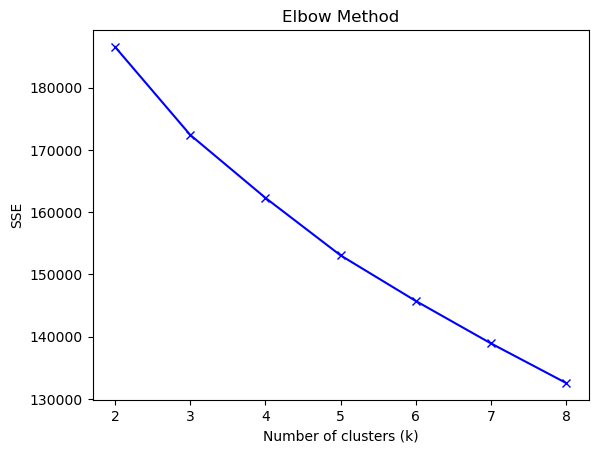

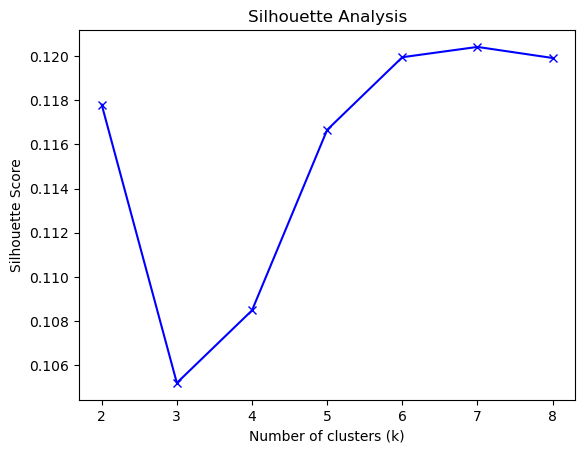

The optimal number of clusters is 7


/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


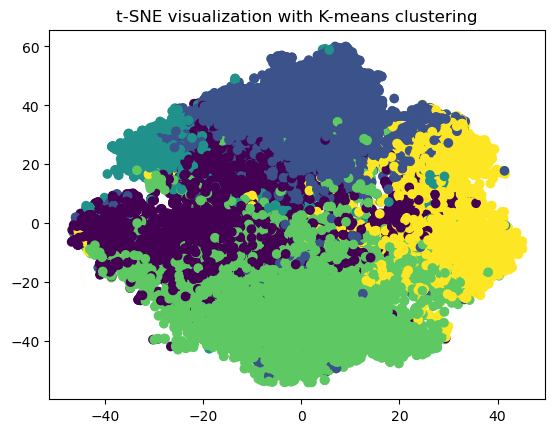

The silhouetter score with 2 clusters is 0.11780056476897625
The silhouetter score with 3 clusters is 0.10520219524827526
The silhouetter score with 4 clusters is 0.10848567589850233
The silhouetter score with 5 clusters is 0.11665931195425584
The silhouetter score with 6 clusters is 0.11994803043511651
The silhouetter score with 7 clusters is 0.12041411581890736
The silhouetter score with 8 clusters is 0.11991316259139445


In [7]:
## KMEANS
# Define a range of number of clusters to test
k_range = range(2, 9)

# Initialize empty lists to store the SSE and silhouette scores
sse = []
silhouette_scores = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_standardized, kmeans.labels_))

# Plot the elbow curve
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}")

# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()
for k in k_range:
    print(f'The silhouetter score with {k} clusters is {silhouette_scores[k-2]}')

/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


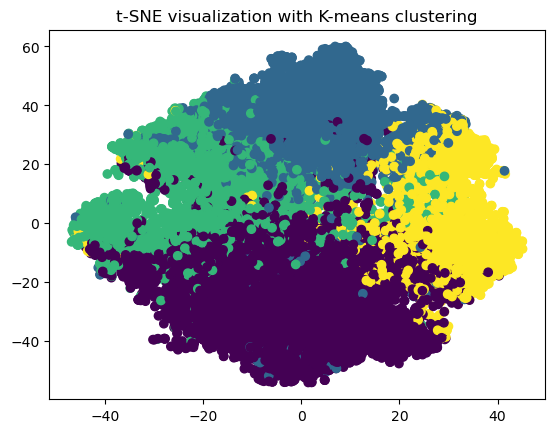

/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


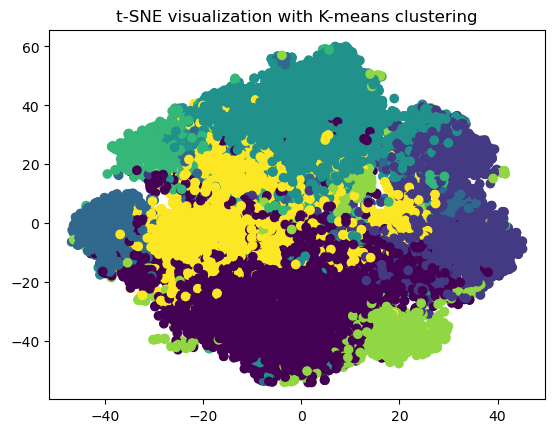

In [8]:
### KMEANS TSNE 4
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()

### KMEANS TSNE 7
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()

In [9]:
for k in [4,7]:
    kmeans_train_df=df_standardized.copy()
    kmeans_test_df=test_df.copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    for df in [kmeans_train_df, kmeans_test_df]:
        labels = kmeans.predict(df)
        print(set(labels))
        df['cluster_kmeans'] = labels
        if df is kmeans_train_df:
            df.to_csv(f'Train {k}Kmeans.csv', index=False)  
        else:
            df.to_csv(f'Test {k}Kmeans.csv', index=False)  

{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5}


In [10]:
kmeans4 =pd.read_csv('Train 4Kmeans.csv')

In [11]:
print(kmeans4)

       alkaline_phosphatase  c_reactive_protein  cystatin_c     HbA1c  \
0                  0.819992           -0.056269    0.169255 -0.171355   
1                 -1.664307           -0.168587    0.062894  0.251426   
2                  0.411183           -0.303369    0.671514  0.646022   
3                 -0.854551           -0.483077    0.742421  0.176265   
4                  0.415114            2.165377   -1.443883  0.674208   
...                     ...                 ...         ...       ...   
18817             -0.198099           -0.426918   -0.782083 -0.490789   
18818              0.187125           -0.570685    0.204708 -0.321677   
18819             -0.371056           -0.474092   -0.433456 -0.556555   
18820              1.547200            0.862490   -0.687540 -0.274701   
18821              0.132093           -0.489816   -0.285733 -1.063893   

          IGF_1  lipoprotein  phosphate      SHBG  total_bilirubin  \
0      0.119085    -0.805042  -0.064059 -0.040655    

In [8]:
####gaussian mixture

from sklearn.mixture import GaussianMixture
import numpy as np

# Define a range of number of clusters to test
n_component_range = range(2, 9)

# Initialize empty lists to store the log-likelihood and BIC scores
log_lik = []
bic_scores = []

# Fit Gaussian Mixture Model for each value of n
for n in n_component_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    log_lik.append(gmm.score(df_standardized))
    bic_scores.append(gmm.bic(df_standardized))

# Print the log-likelihood and BIC scores
for n, log_lik_score, bic_score in zip(n_component_range, log_lik, bic_scores):
    print(f"Number of Components: {n}")
    print(f"Log-Likelihood Score: {log_lik_score}")
    print(f"BIC Score: {bic_score}")
    print()

Number of Components: 2
Log-Likelihood Score: -14.616927719987338
BIC Score: 551765.2582512032

Number of Components: 3
Log-Likelihood Score: -13.408305055645721
BIC Score: 507035.6036455661

Number of Components: 4
Log-Likelihood Score: -13.024777652841934
BIC Score: 493365.835065259

Number of Components: 5
Log-Likelihood Score: -12.846891781077932
BIC Score: 487437.23627941357

Number of Components: 6
Log-Likelihood Score: -12.709762045484872
BIC Score: 483042.86148358707

Number of Components: 7
Log-Likelihood Score: -12.584629079532151
BIC Score: 479100.0930841015

Number of Components: 8
Log-Likelihood Score: -12.45491712105883
BIC Score: 474984.95309017046



In [12]:
for k in [4,7]:
    kmeans_train_df=df_standardized.copy()
    kmeans_test_df=test_df.copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    for df in [kmeans_train_df, kmeans_test_df]:
        labels = kmeans.predict(df)
        print(set(labels))
        df['cluster_kmeans'] = labels
        if df is kmeans_train_df:
            df.to_csv(f'Train {k}Kmeans.csv', index=False)  
        else:
            df.to_csv(f'Test {k}Kmeans.csv', index=False)  

{0, 1, 2, 3}


/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
- age_recr
- bmi
- case
- drinking_status
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but KMeans is expecting 11 features as input.

consensus clustering

DBSCAN

In [9]:
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
df_standardized, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

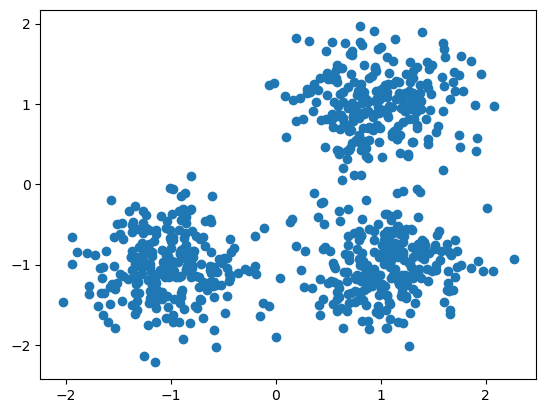

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df_standardized[:, 0], df_standardized[:, 1])
plt.show()

In [22]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps = 0.2
min_samples = df_standardized.shape[1] + 1

db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_standardized)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 25


In [23]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(df_standardized, labels):.3f}")

Homogeneity: 0.955
Completeness: 0.817
V-measure: 0.881
Adjusted Rand Index: 0.923
Adjusted Mutual Information: 0.880
Silhouette Coefficient: 0.288


Trying out PCA 

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [79]:
data=pd.read_csv('train_num.csv')

In [40]:
features = ['alkaline_phosphatase', 'c_reactive_protein', 'cystatin_c', 'HbA1c',
       'IGF_1', 'lipoprotein', 'phosphate', 'SHBG', 'total_bilirubin',
       'testosterone', 'triglycerides']

x = data.loc[:, features].values

x = scaler.fit_transform(x)

In [41]:
x.shape

(18822, 11)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [42]:
np.mean(x),np.std(x)

(-1.4606069702741406e-16, 1.0)

convert the normalized features into a tabular format with the help of DataFrame.

In [43]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [44]:
normalised_diabetes = pd.DataFrame(x,columns=feat_cols)

In [45]:
normalised_diabetes.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
18817,-0.198099,-0.426918,-0.782083,-0.490789,-0.977878,-0.423259,-0.917522,-0.275465,-0.690635,-1.116904,0.284251
18818,0.187125,-0.570685,0.204708,-0.321677,0.564316,1.430822,-1.824700,0.060494,0.039654,1.211428,-0.062739
18819,-0.371056,-0.474092,-0.433456,-0.556555,0.147634,-0.656593,0.616325,0.645262,-0.460384,-1.125199,-0.850661
18820,1.547200,0.862490,-0.687540,-0.274701,-0.430885,0.479006,0.282101,0.648875,0.372238,1.347154,-0.200689
18821,0.132093,-0.489816,-0.285733,-1.063893,-1.278259,1.926327,0.461150,-0.951899,-0.071982,-0.049987,1.682368


diabetes data to two-dimensional principal components.

use the sklearn library to import the PCA module, and in the PCA method, will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which will project your higher dimension data.

A rule of thumb here is that the cumulative variance explained by the components should be at least 70%.

In [51]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=7)
principalComponents_diabetes = pca_diabetes.fit_transform(x)

create a DataFrame that will have the principal component values for all samples

In [52]:
principal_diabetes_Df = pd.DataFrame(data = principalComponents_diabetes
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                         'principal component 4', 'principal component 5', 'principal component 6', 
                          'principal component 7'])

In [53]:
principal_diabetes_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
18817,0.249515,0.550986,-0.076911,-1.487451,0.150343,-0.538587,-0.998480
18818,-1.242627,-0.845751,0.659387,0.303053,-1.715311,-0.143898,-0.817823
18819,-0.285574,1.654410,-0.706538,-0.136893,0.783283,0.275359,-0.203999
18820,0.132667,0.147867,1.234414,0.339149,-0.582981,0.763947,0.184475
18821,0.449735,-0.450305,-0.582286,-0.021705,-1.208700,-2.056564,0.082640


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [59]:
print('Explained variation per principal component: {}'.format(pca_diabetes.explained_variance_ratio_))

Explained variation per principal component: [0.15226456 0.13368317 0.1081718  0.09863691 0.09118689 0.08363137
 0.08207861]


In [80]:
## Response Variable

print(data['case'].value_counts())

data['case'] = data['case'].map({0:'control', 1:'case'})

print(data['case'].value_counts())

data['case'] = data['case'].astype('category')

1    9411
0    9411
Name: case, dtype: int64
case       9411
control    9411
Name: case, dtype: int64


In [81]:
y_data = data['case']    # Select column 17 as the target variable

In [82]:
y_data

0           case
1           case
2           case
3           case
4           case
          ...   
18817    control
18818    control
18819    control
18820    control
18821    control
Name: case, Length: 18822, dtype: category
Categories (2, object): ['case', 'control']

<Figure size 640x480 with 0 Axes>

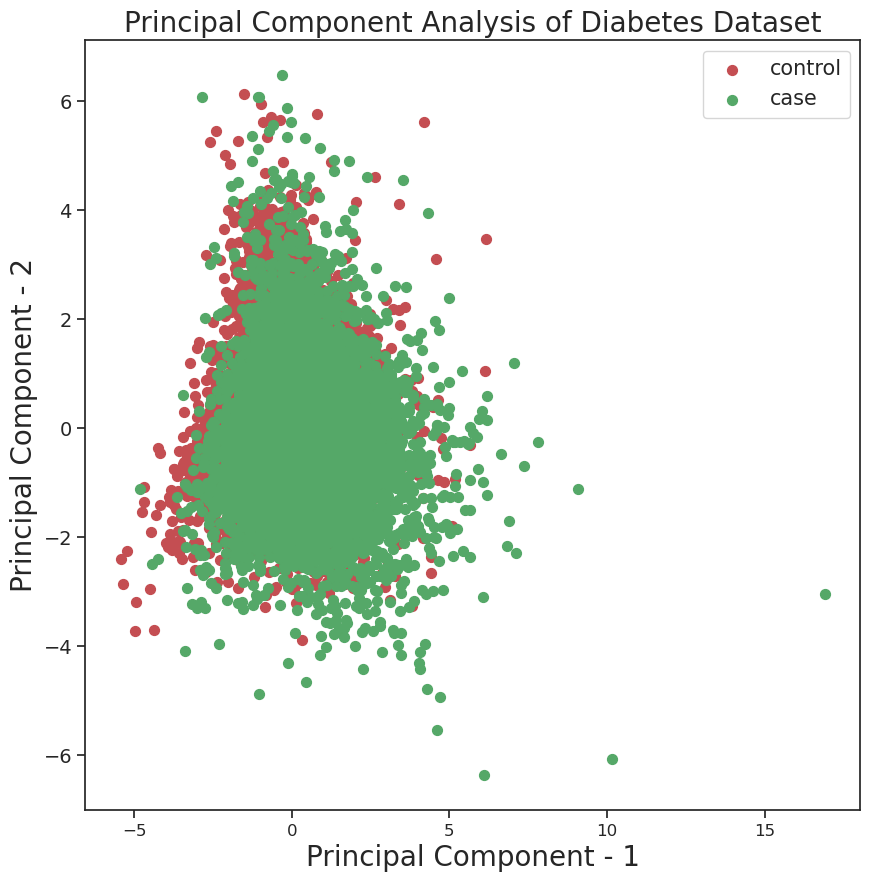

In [86]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)

plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = ['control', 'case']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['case'] == target
    plt.scatter(principal_diabetes_Df.loc[indicesToKeep, 'principal component 1']
               , principal_diabetes_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

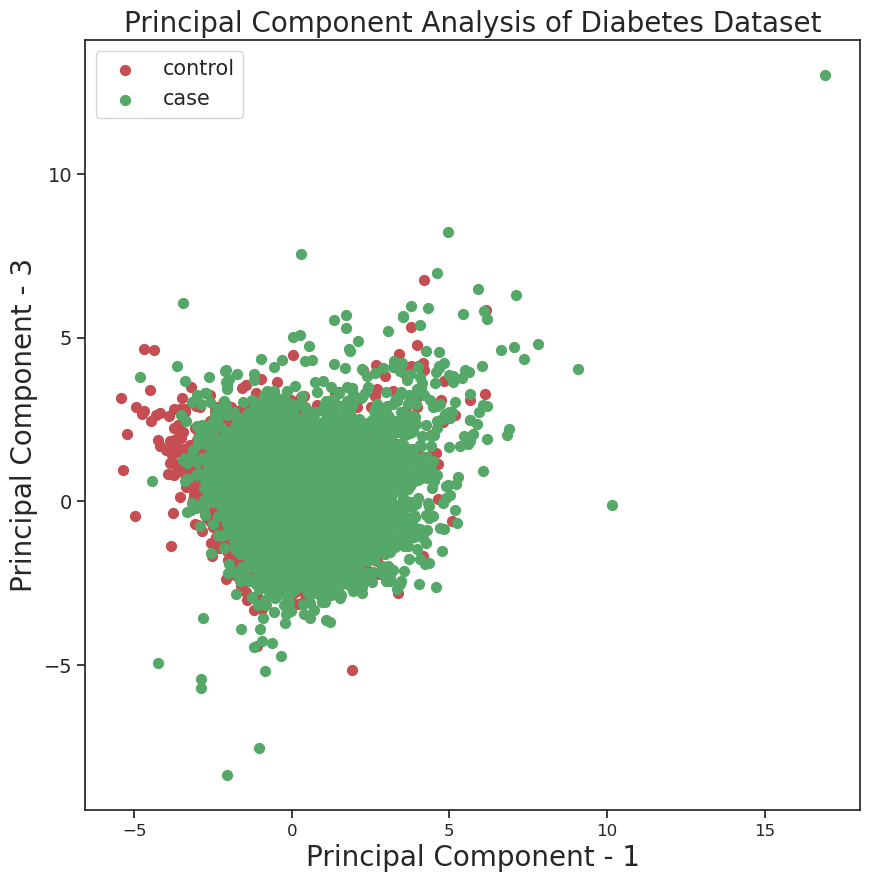

In [87]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)

plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = ['control', 'case']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['case'] == target
    plt.scatter(principal_diabetes_Df.loc[indicesToKeep, 'principal component 1']
               , principal_diabetes_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

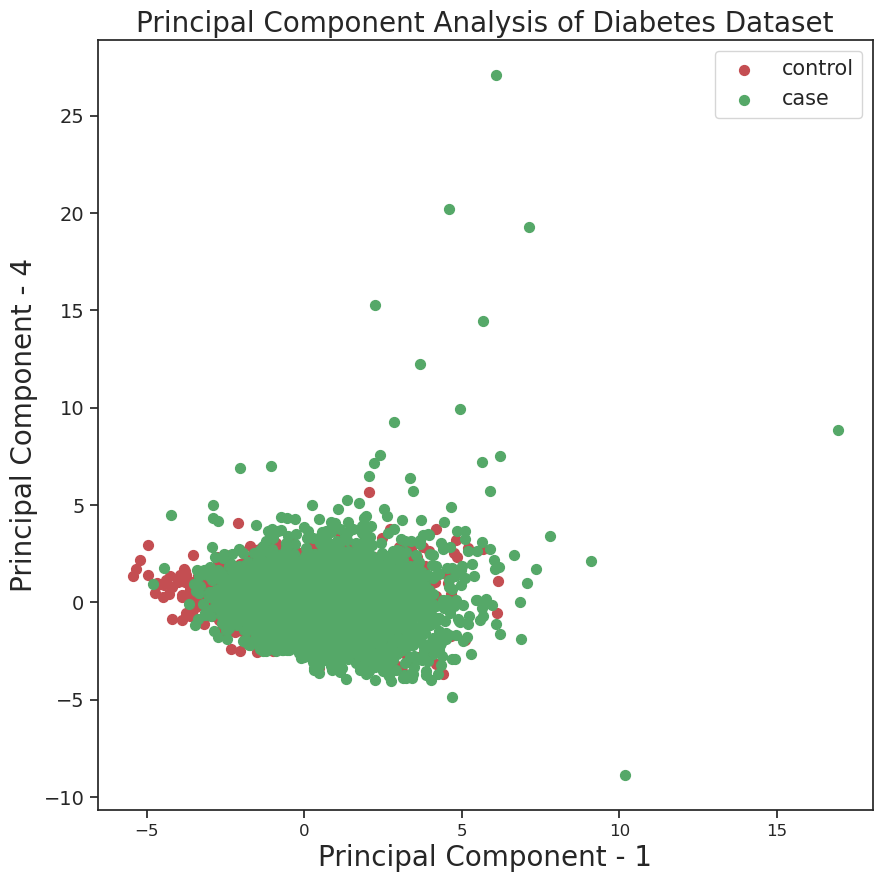

In [88]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 4',fontsize=20)

plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = ['control', 'case']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['case'] == target
    plt.scatter(principal_diabetes_Df.loc[indicesToKeep, 'principal component 1']
               , principal_diabetes_Df.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

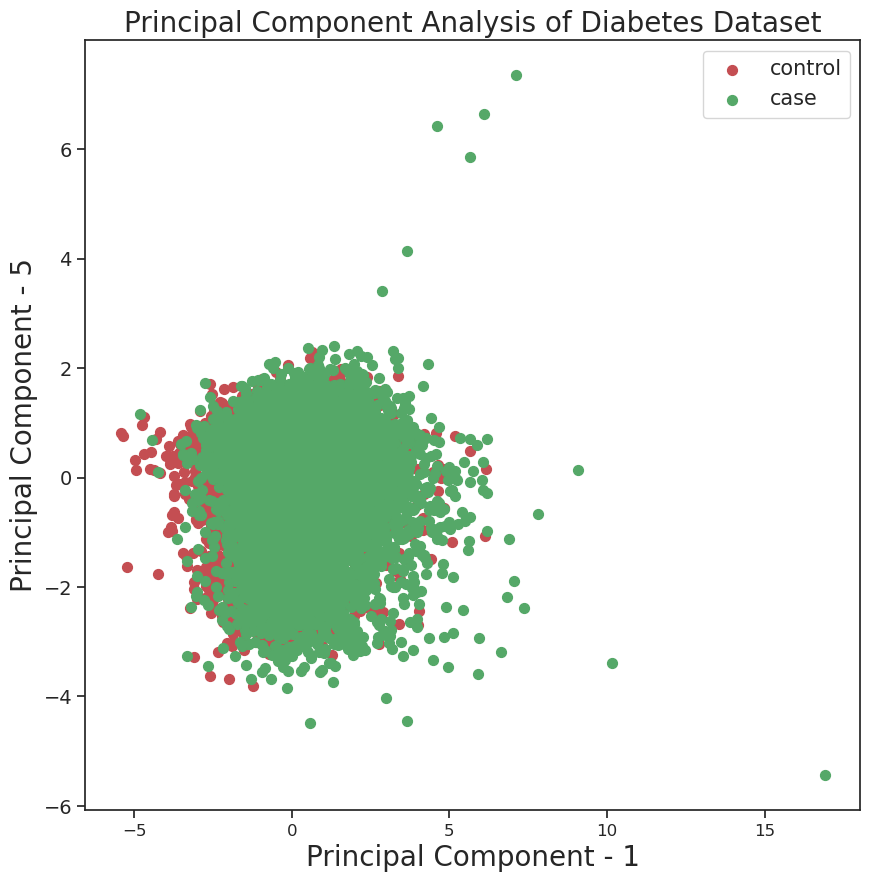

In [89]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 5',fontsize=20)

plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = ['control', 'case']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['case'] == target
    plt.scatter(principal_diabetes_Df.loc[indicesToKeep, 'principal component 1']
               , principal_diabetes_Df.loc[indicesToKeep, 'principal component 5'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

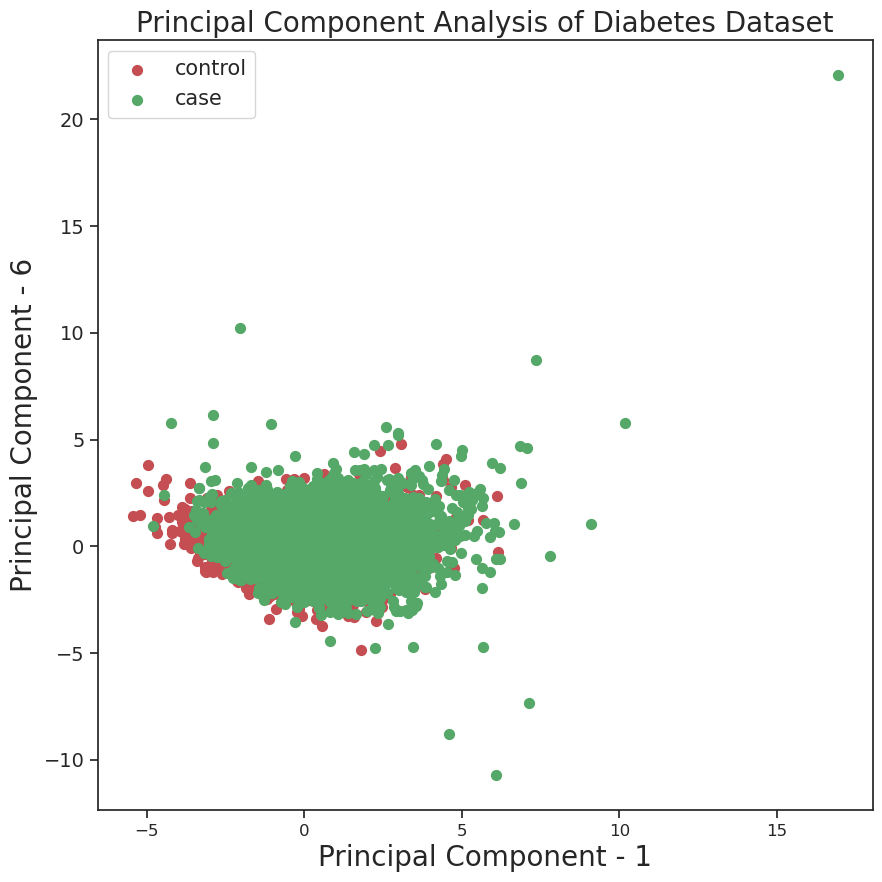

In [90]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 6',fontsize=20)

plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = ['control', 'case']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['case'] == target
    plt.scatter(principal_diabetes_Df.loc[indicesToKeep, 'principal component 1']
               , principal_diabetes_Df.loc[indicesToKeep, 'principal component 6'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

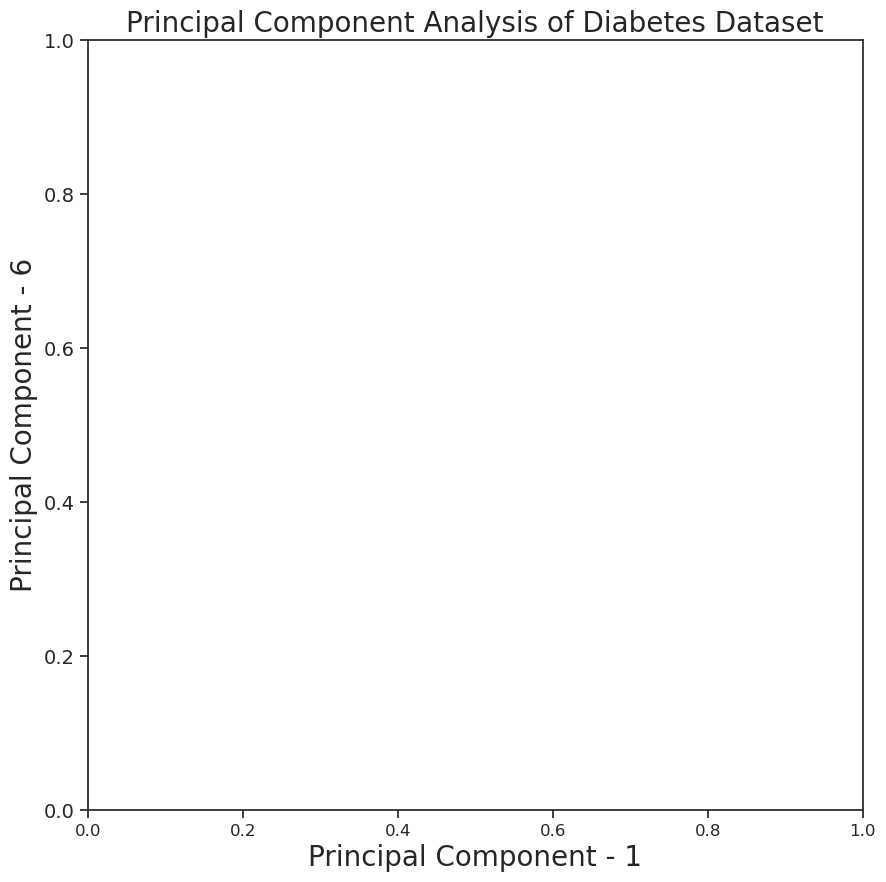

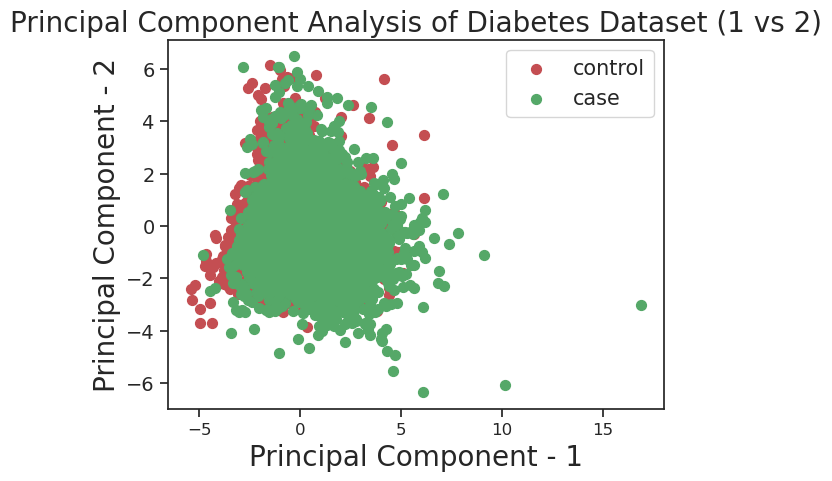

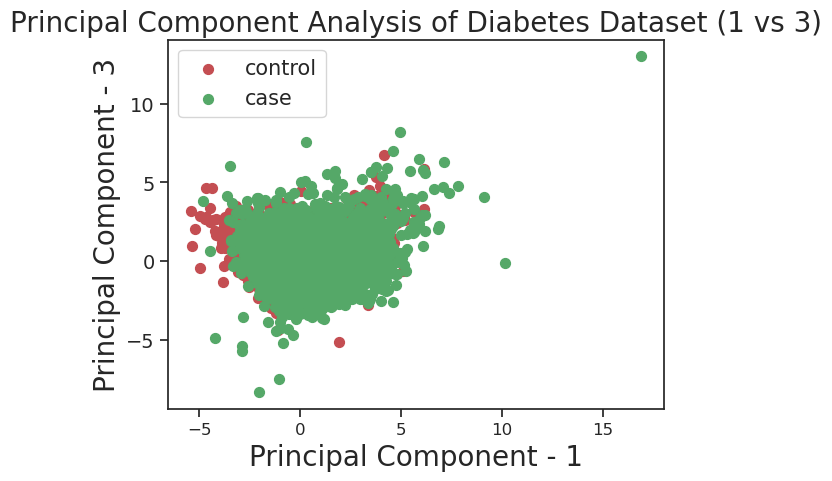

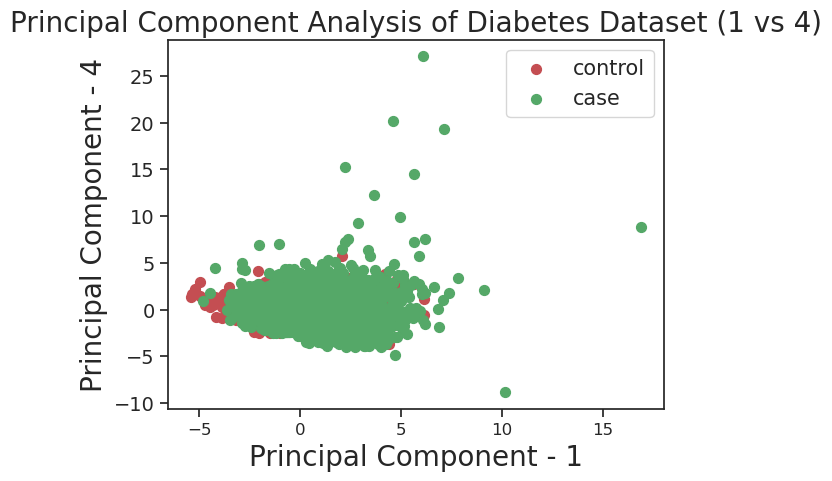

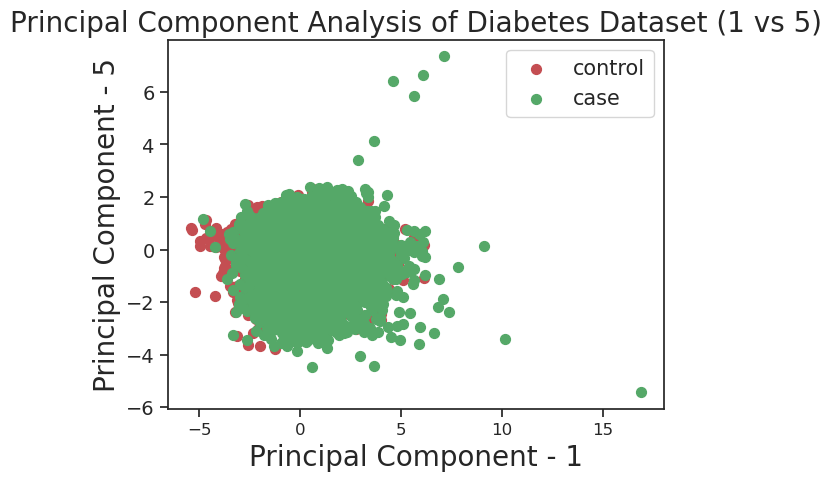

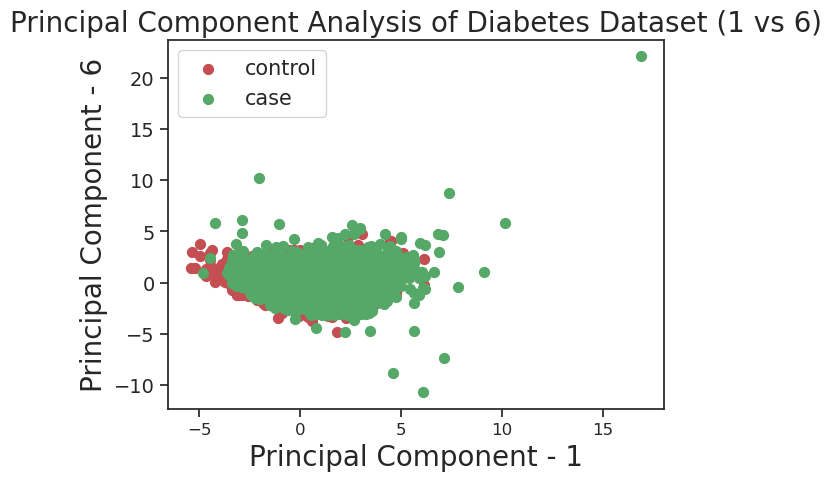

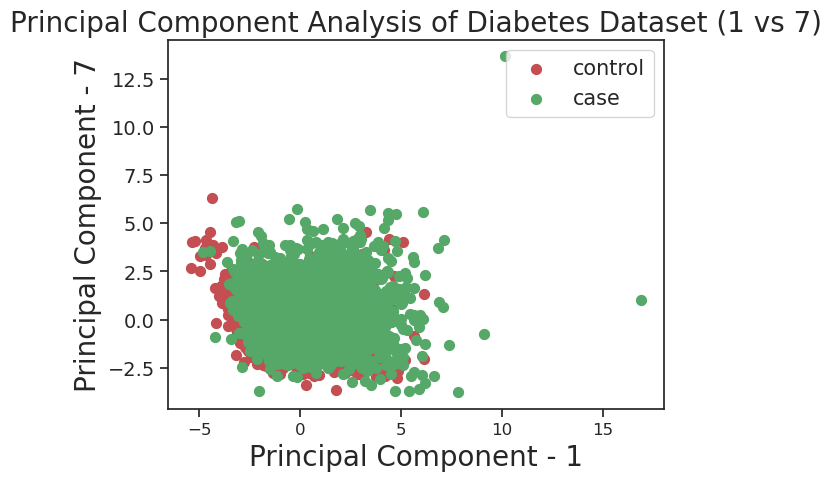

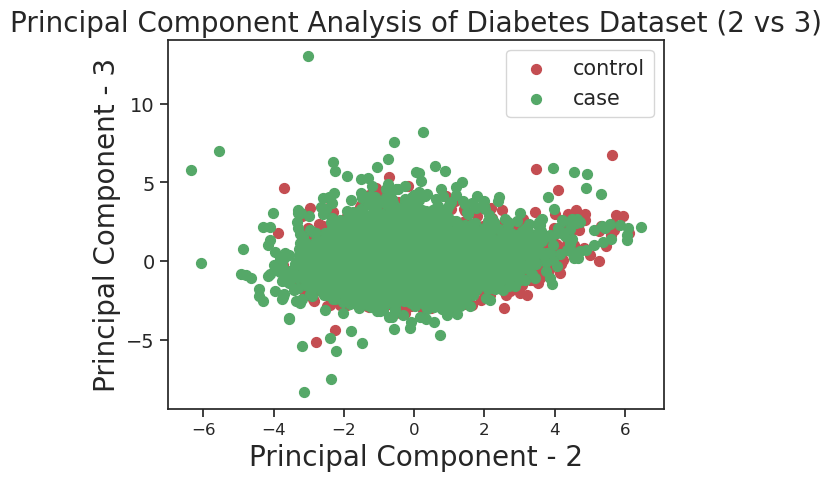

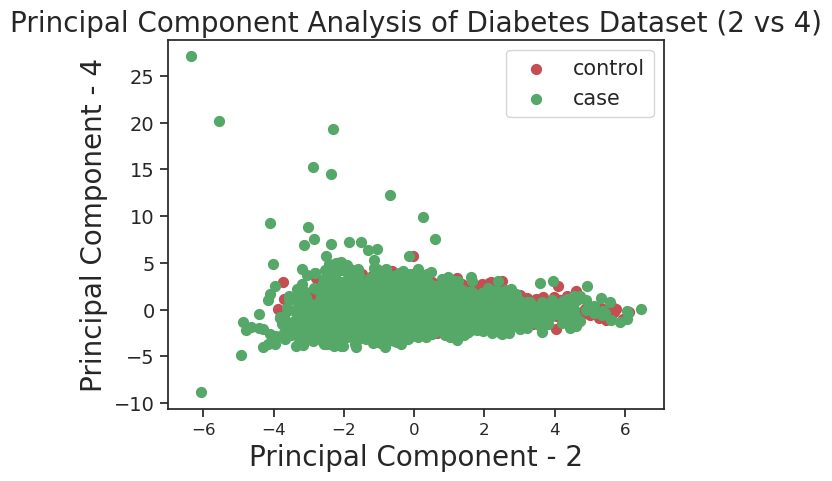

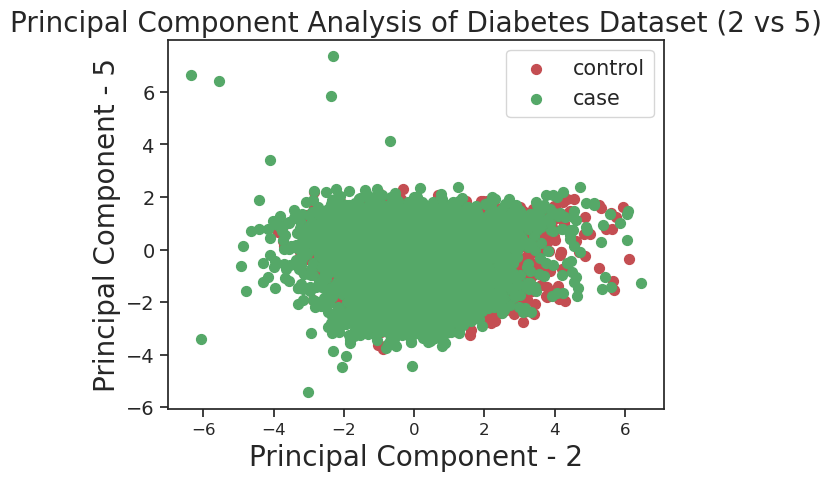

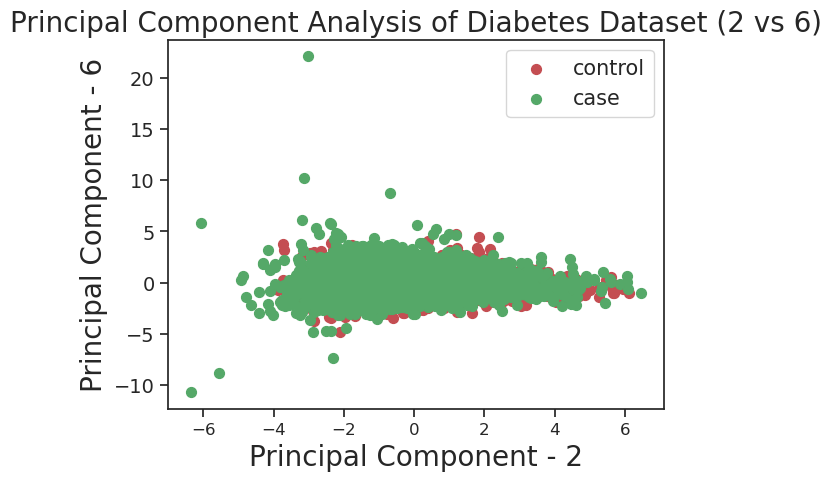

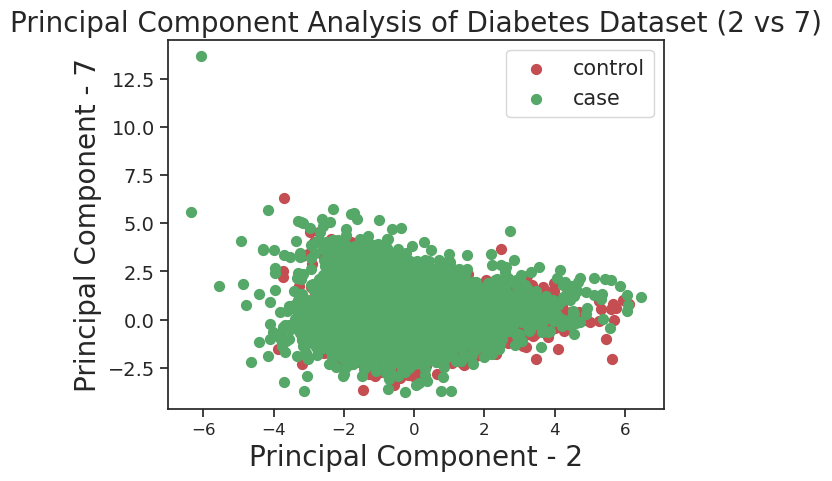

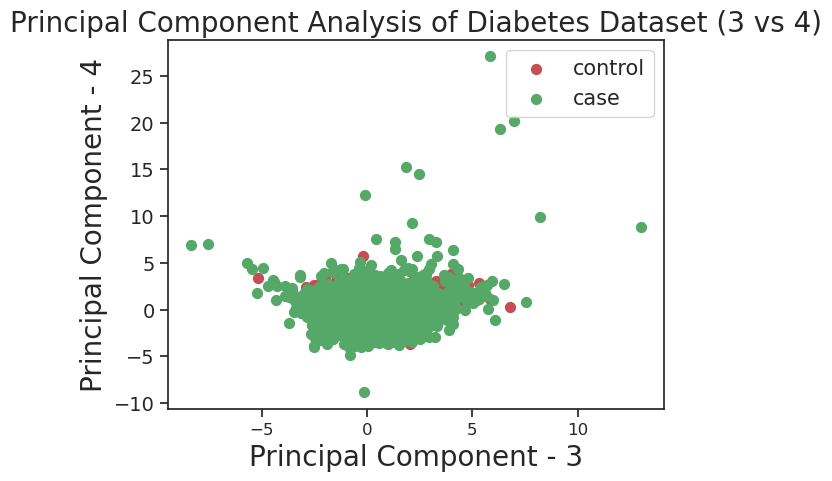

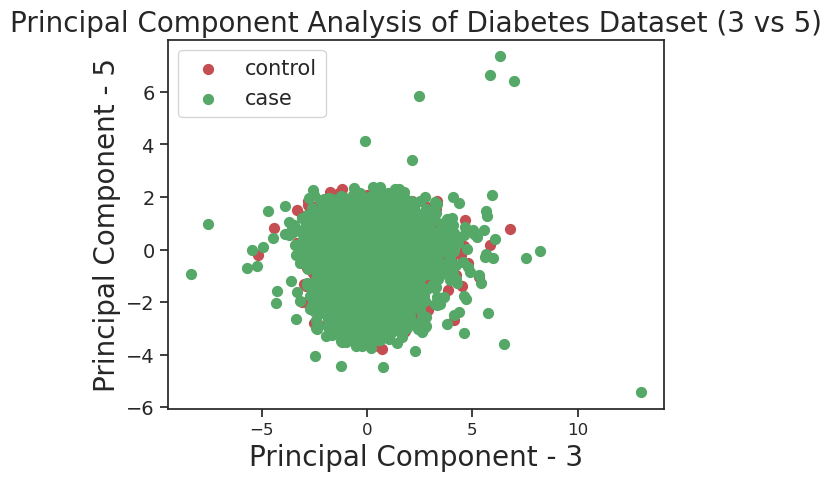

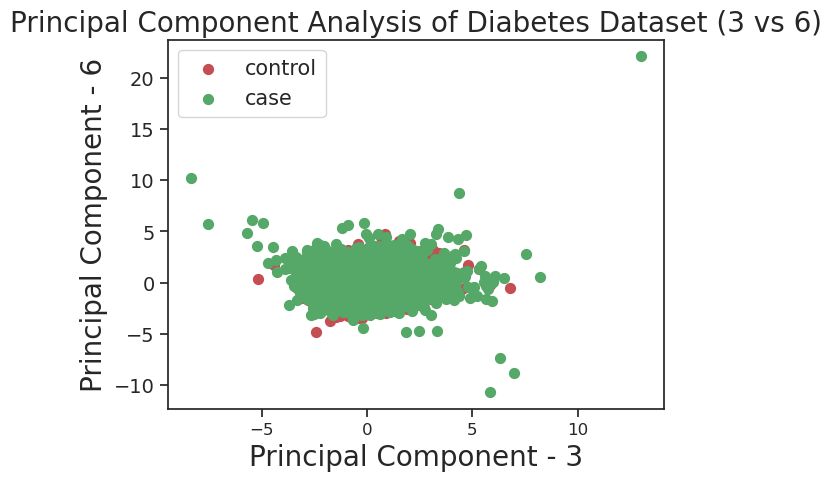

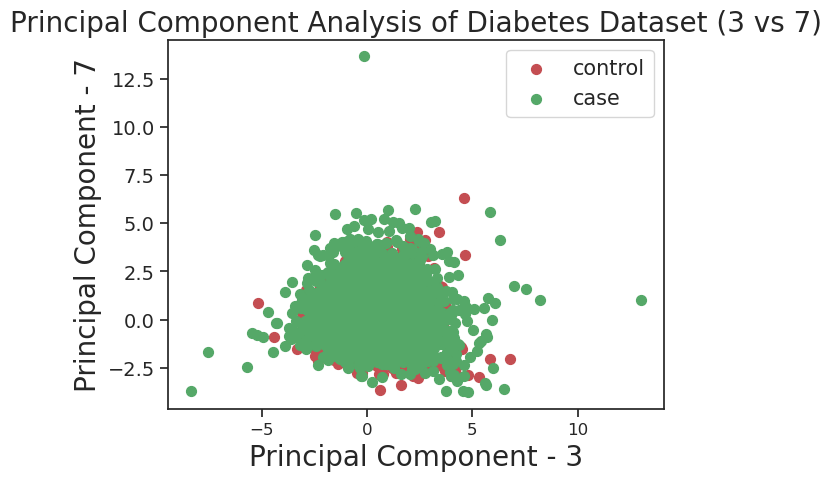

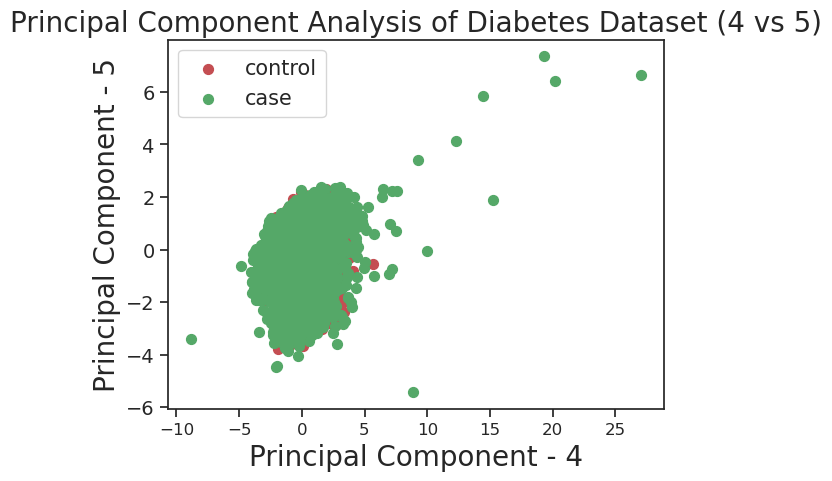

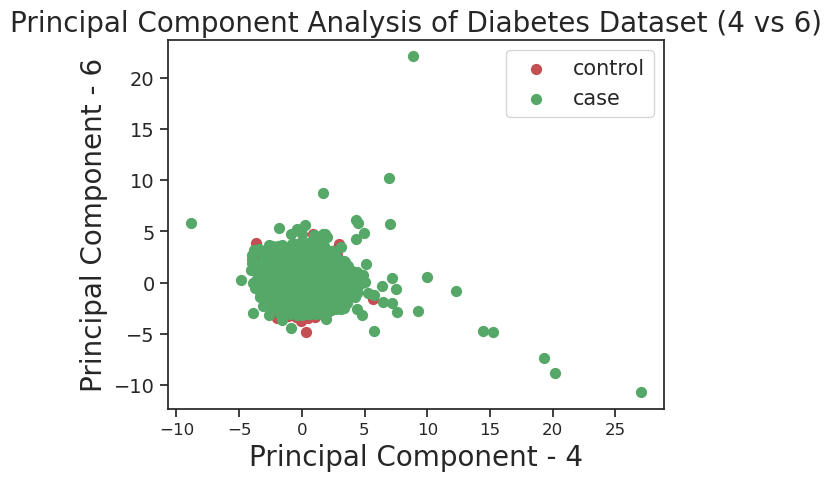

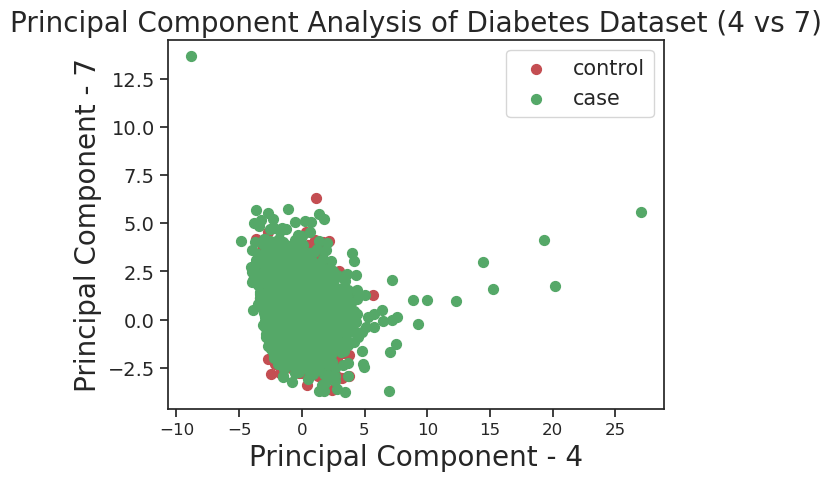

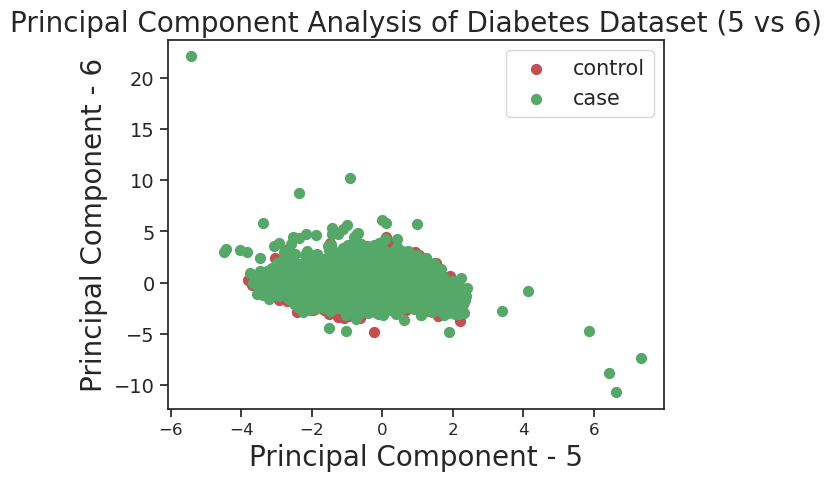

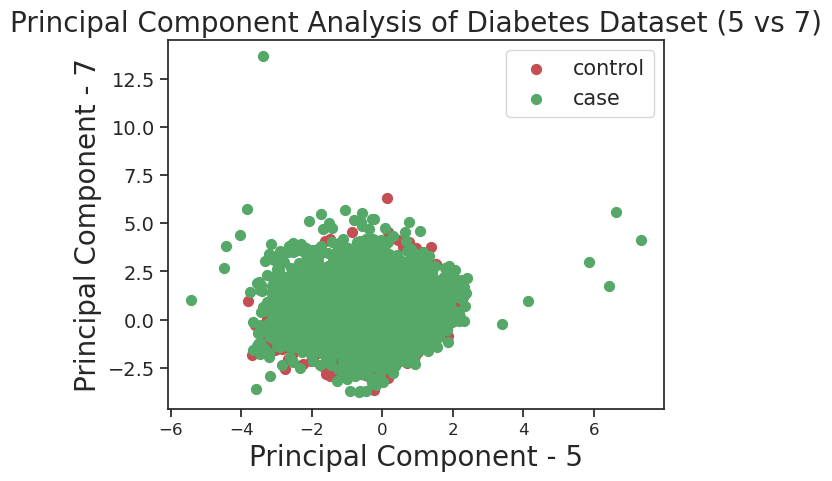

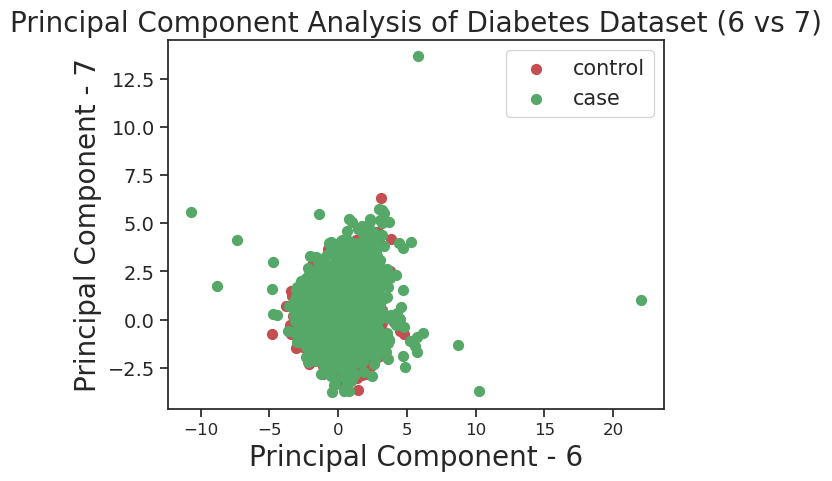

In [91]:
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 6', fontsize=20)
plt.title("Principal Component Analysis of Diabetes Dataset", fontsize=20)

targets = ['control', 'case']
colors = ['r', 'g']

# Get the number of principal components
num_components = 7

for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.figure()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.xlabel(f'Principal Component - {i+1}', fontsize=20)
        plt.ylabel(f'Principal Component - {j+1}', fontsize=20)
        plt.title(f"Principal Component Analysis of Diabetes Dataset ({i+1} vs {j+1})", fontsize=20)
        
        for target, color in zip(targets, colors):
            indicesToKeep = data['case'] == target
            plt.scatter(principal_diabetes_Df.loc[indicesToKeep, f'principal component {i+1}'],
                        principal_diabetes_Df.loc[indicesToKeep, f'principal component {j+1}'],
                        c=color, s=50)
        
        plt.legend(targets, prop={'size': 15})
        plt.show()


In [60]:
print(data)

       alkaline_phosphatase  c_reactive_protein  cystatin_c  HbA1c   IGF_1  \
0                     107.0                2.85       0.966   38.9  21.620   
1                      43.8                2.35       0.948   43.4  17.447   
2                      96.6                1.75       1.051   47.6  14.517   
3                      64.4                0.95       1.063   42.6  17.864   
4                      96.7               12.74       0.693   47.9  19.439   
...                     ...                 ...         ...    ...     ...   
18817                  81.1                1.20       0.805   35.5  15.357   
18818                  90.9                0.56       0.972   37.3  24.162   
18819                  76.7                0.99       0.864   34.8  21.783   
18820                 125.5                6.94       0.821   37.8  18.480   
18821                  89.5                0.92       0.889   29.4  13.642   

       lipoprotein  phosphate   SHBG  total_bilirubin  testoste

In [27]:
### drop out the columns that are not needed 
cols_to_drop=['Unnamed: 0','case', 'age_recr', 'sex', 'bmi',
            'smoke_status', 'drinking_status']
data.drop(columns=cols_to_drop, inplace=True)

In [35]:
# scaling 
scaler = StandardScaler()
x = scaler.fit_transform(data)


In [36]:
x.shape

(18822, 11)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [37]:
np.mean(x),np.std(x)

(-1.4606069702741406e-16, 1.0)

In [92]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with your variables
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                      Unnamed: 0       sex  smoke_status  drinking_status  \
Unnamed: 0              1.000000 -0.004398     -0.130801         0.100667   
sex                    -0.004398  1.000000      0.109801         0.097704   
smoke_status           -0.130801  0.109801      1.000000         0.079027   
drinking_status         0.100667  0.097704      0.079027         1.000000   
bmi                    -0.050176 -0.093237     -0.008863        -0.018971   
age_recr               -0.017630 -0.043472      0.011470         0.041132   
alkaline_phosphatase   -0.095252 -0.151272      0.064855        -0.066497   
c_reactive_protein     -0.093390 -0.109288      0.079980        -0.048306   
cystatin_c             -0.106731  0.102541      0.105190        -0.056716   
HbA1c                  -0.368532  0.009622      0.066593        -0.094887   
IGF_1                   0.043124  0.120973     -0.028413         0.040378   
lipoprotein            -0.005215 -0.038046     -0.010717        -0.001122   

/var/tmp/pbs.7504052.pbs/ipykernel_1205174/657270433.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


/var/tmp/pbs.7504052.pbs/ipykernel_1205174/3812001691.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


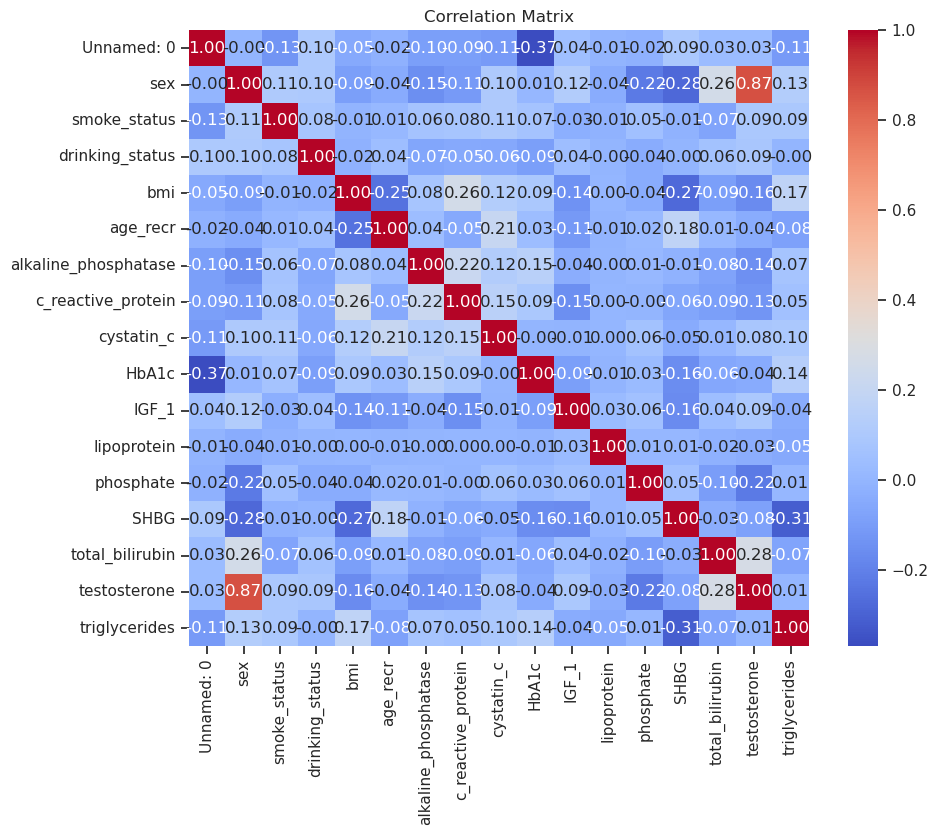

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with your variables
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [32]:
# Assuming you have a DataFrame called df
column_names = data.columns

# Print the column names
print(column_names)

Index(['alkaline_phosphatase', 'c_reactive_protein', 'cystatin_c', 'HbA1c',
       'IGF_1', 'lipoprotein', 'phosphate', 'SHBG', 'total_bilirubin',
       'testosterone', 'triglycerides'],
      dtype='object')


In [33]:
pca = PCA(n_components=11)  # Specify the number of components you want to retain

principal_components = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the component names
component_names = ['alkaline_phosphatase', 'c_reactive_protein', 'cystatin_c', 'HbA1c',
       'IGF_1', 'lipoprotein', 'phosphate', 'SHBG', 'total_bilirubin',
       'testosterone', 'triglycerides']  # Replace with your component names

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for {component_names[i]}: {ratio}")

Explained Variance Ratio for alkaline_phosphatase: 0.1522645619589815
Explained Variance Ratio for c_reactive_protein: 0.1336831703714035
Explained Variance Ratio for cystatin_c: 0.10817180152766848
Explained Variance Ratio for HbA1c: 0.09863690904149472
Explained Variance Ratio for IGF_1: 0.09118688690460425
Explained Variance Ratio for lipoprotein: 0.0836313729589946
Explained Variance Ratio for phosphate: 0.0820786125299407
Explained Variance Ratio for SHBG: 0.07264816472037922
Explained Variance Ratio for total_bilirubin: 0.06967188567068701
Explained Variance Ratio for testosterone: 0.05664862336036469
Explained Variance Ratio for triglycerides: 0.05137801095548152


In [34]:
pca = PCA(n_components=3)  # Specify the number of components you want to retain

principal_components = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_


# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Component {i+1}: {ratio}")

Explained Variance Ratio for Component 1: 0.15226456195898105
Explained Variance Ratio for Component 2: 0.1336831703714033
Explained Variance Ratio for Component 3: 0.10817180152766841
